 # Types of Regression in Machine Learning
1. **Linear Regression**  
   Predicts a target variable using a straight line based on a linear relationship between input and output.

2. **Polynomial Regression**  
   Extends linear regression by adding polynomial terms, allowing it to model non-linear relationships.

3. **Stepwise Regression**  
   Iteratively adds or removes features based on statistical criteria to improve model performance.

4. **Decision Tree Regression**  
   Splits data into regions using decision rules, predicting the mean output for each region.

5. **Random Forest Regression**  
   An ensemble of decision trees that improves accuracy by averaging predictions from multiple trees.

6. **Support Vector Regression (SVR)**  
   Uses the principles of Support Vector Machines to fit the best line within a margin of tolerance.

7. **Ridge Regression**  
   A linear model with L2 regularization to reduce overfitting by shrinking coefficients.

8. **ElasticNet Regression**  
   Combines L1 and L2 regularization for a balance between Ridge and Lasso.



In [8]:
!apt-get install fonts-noto-color-emoji
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Color Emoji'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-noto-color-emoji
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.0 MB of archives.
After this operation, 11.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 fonts-noto-color-emoji all 2.047-0ubuntu0.22.04.1 [10.0 MB]
Fetched 10.0 MB in 2s (5,506 kB/s)
Selecting previously unselected package fonts-noto-color-emoji.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../fonts-noto-color-emoji_2.047-0ubuntu0.22.04.1_all.deb ...
Unpacking fonts-noto-color-emoji (2.047-0ubuntu0.22.04.1) ...
Setting up fonts-noto-color-emoji (2.047-0ubuntu0.22.04.1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

# Completely override any font setting trying to use emoji fonts
plt.rcParams['font.family'] = 'DejaVu Sans'  # A safe default
warnings.filterwarnings("ignore", category=UserWarning)


# *Preprocessing*

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedHouseVal")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Save processed features and target
X_scaled_df.to_csv("california_processed.csv", index=False)
y.to_csv("california_target.csv", index=False)

print("✅ Preprocessing completed and saved as california_processed.csv and california_target.csv")



✅ Preprocessing completed and saved as california_processed.csv and california_target.csv


## 🔹 Linear Regression

Linear Regression is the most basic and commonly used regression technique. It assumes a linear relationship between the independent variables (features) and the dependent variable (target). The model tries to fit a straight line that best represents the data.



Linear Regression Results:
MAE  = 0.5332
MSE  = 0.5559
RMSE = 0.7456
R²   = 0.5758


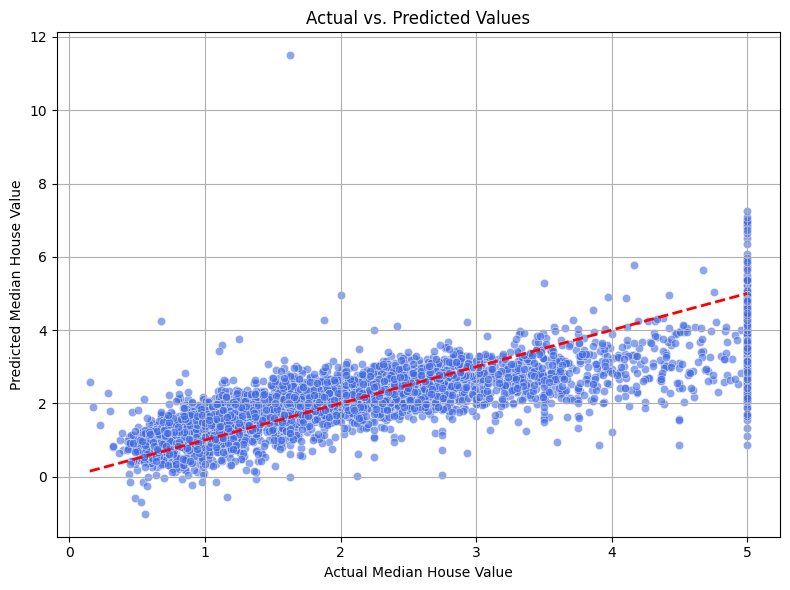

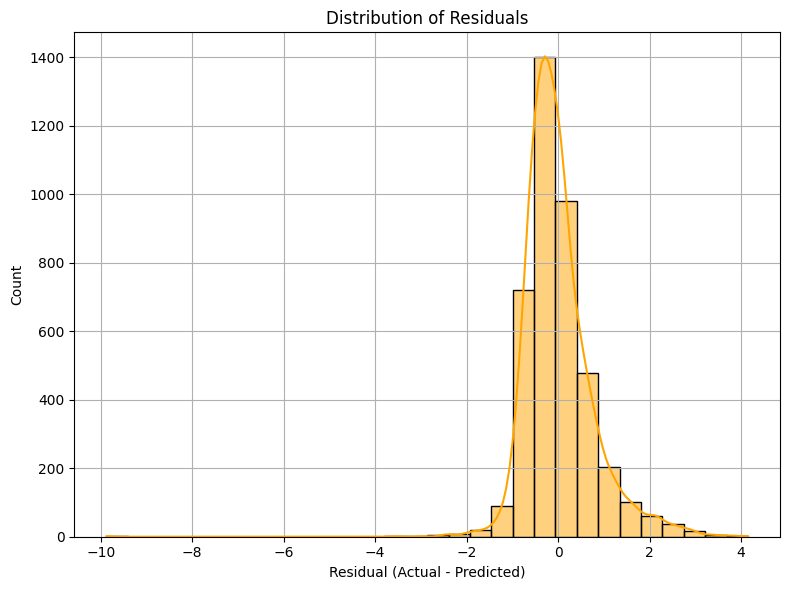

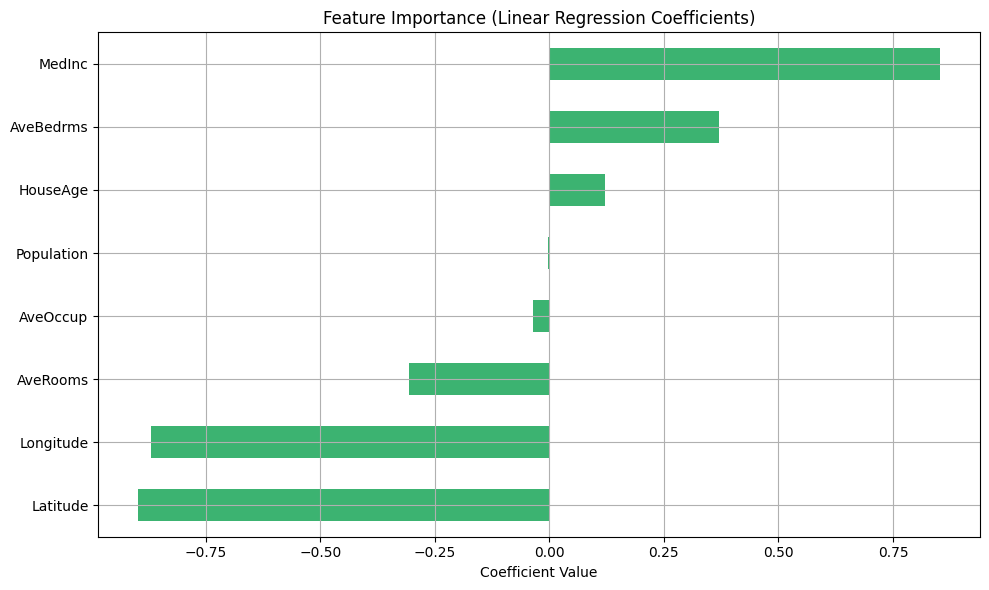

In [14]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🔕 Suppress font and user warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 🧾 Load preprocessed data
X = pd.read_csv("california_processed.csv")
y = pd.read_csv("california_target.csv").squeeze()

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📈 Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 🧮 Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 🖨️ Print metrics
print("Linear Regression Results:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="royalblue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="orange", bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Feature importance (coefficients)
coefs = pd.Series(lr.coef_, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh', color='mediumseagreen')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔸 Polynomial Regression

Polynomial Regression is a type of linear regression where the relationship between the independent variable \( x \) and the dependent variable \( y \) is modeled as an nth-degree polynomial. It helps to capture non-linear relationships in the data.




📊 Polynomial Regression Results (Degree=2):
MAE  = 0.4670
MSE  = 0.4643
RMSE = 0.6814
R²   = 0.6457


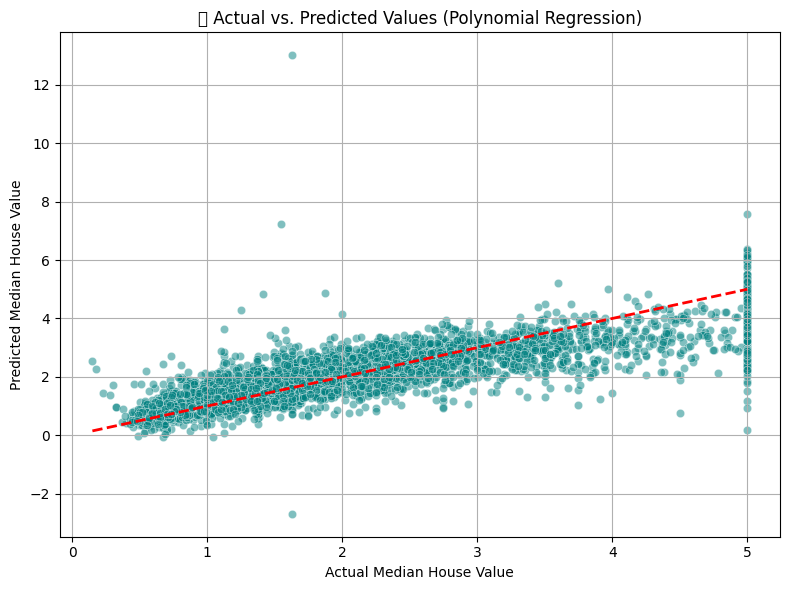

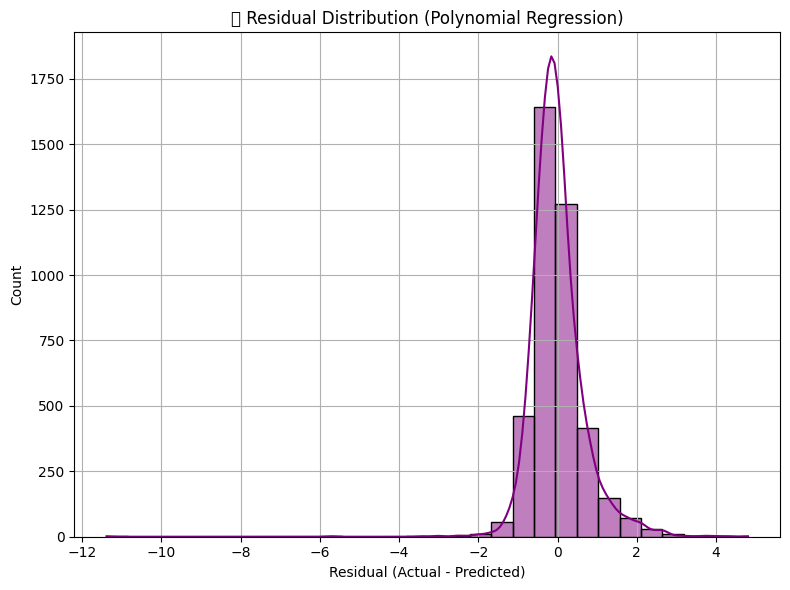

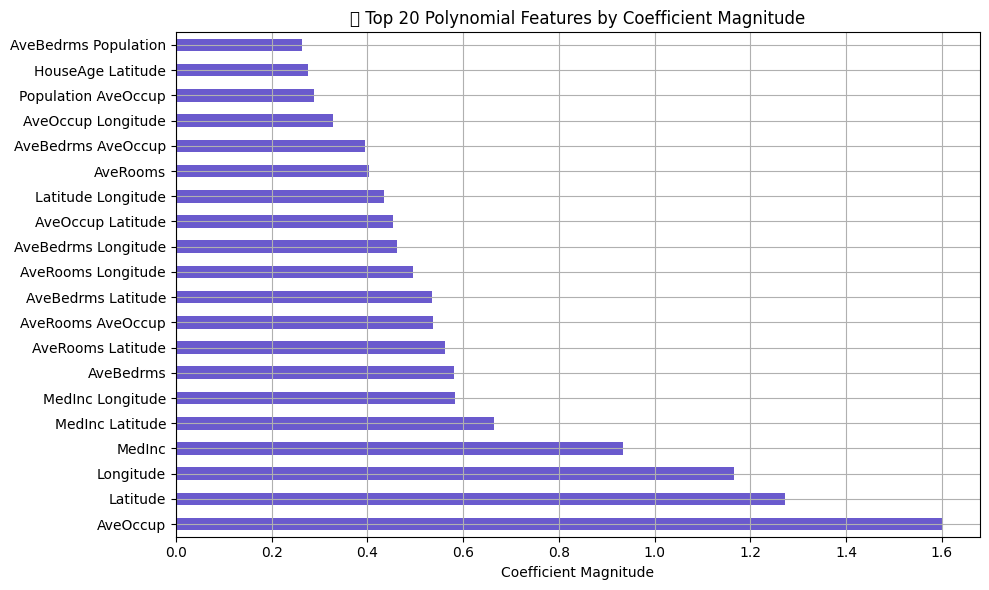

In [15]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🧾 Load preprocessed data
X = pd.read_csv("california_processed.csv")
y = pd.read_csv("california_target.csv").squeeze()  # Convert to Series

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙️ Polynomial feature transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 📈 Train model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)

# 🧮 Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 🖨️ Print metrics
print("📊 Polynomial Regression Results (Degree=2):")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# 📍 Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="teal", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("🔍 Actual vs. Predicted Values (Polynomial Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple", bins=30)
plt.title("📉 Residual Distribution (Polynomial Regression)")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Plot 3: Top Feature Importances (by absolute coefficient)
feature_names = poly.get_feature_names_out(X.columns)
coefs = pd.Series(poly_reg.coef_, index=feature_names)
top_coefs = coefs.abs().sort_values(ascending=False).head(20)  # Top 20

plt.figure(figsize=(10, 6))
top_coefs[top_coefs.index].plot(kind='barh', color='slateblue')
plt.title("📌 Top 20 Polynomial Features by Coefficient Magnitude")
plt.xlabel("Coefficient Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()


## Ridge Regression 🧮

Ridge Regression introduces L2 regularization to linear regression, helping to prevent overfitting by shrinking the magnitude of model coefficients. This is especially useful when features are highly correlated.

**Key Concepts:**
- Adds penalty proportional to the square of coefficients.
- Helps with multicollinearity.
- Controlled by regularization strength `alpha`.


Ridge Regression Results:
MAE  = 0.5332
MSE  = 0.5559
RMSE = 0.7456
R²   = 0.5758


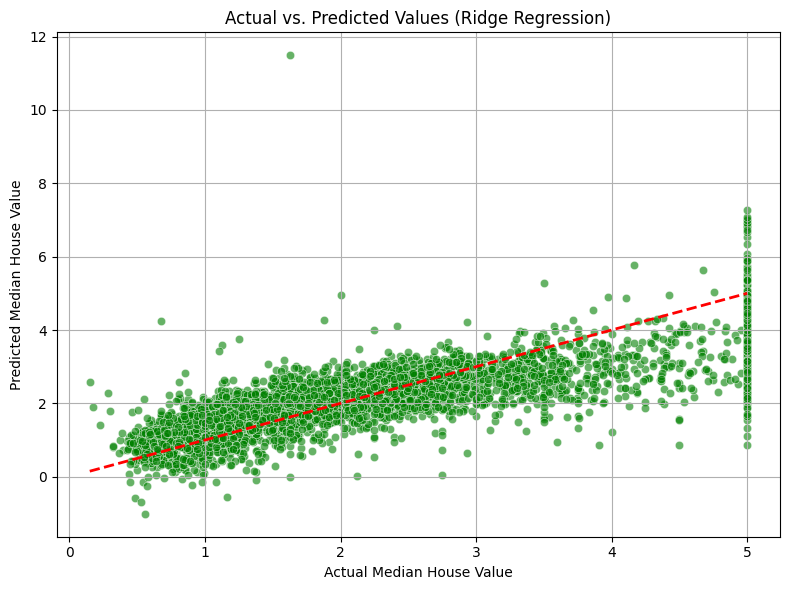

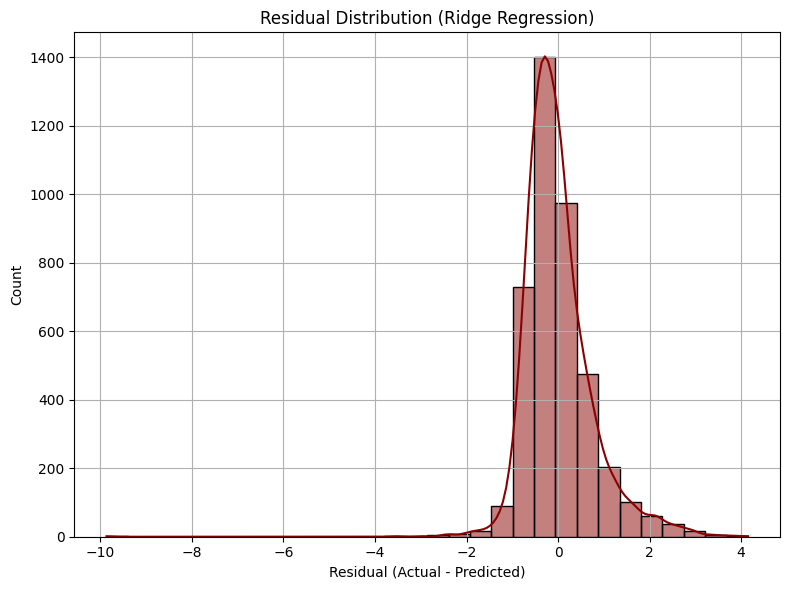

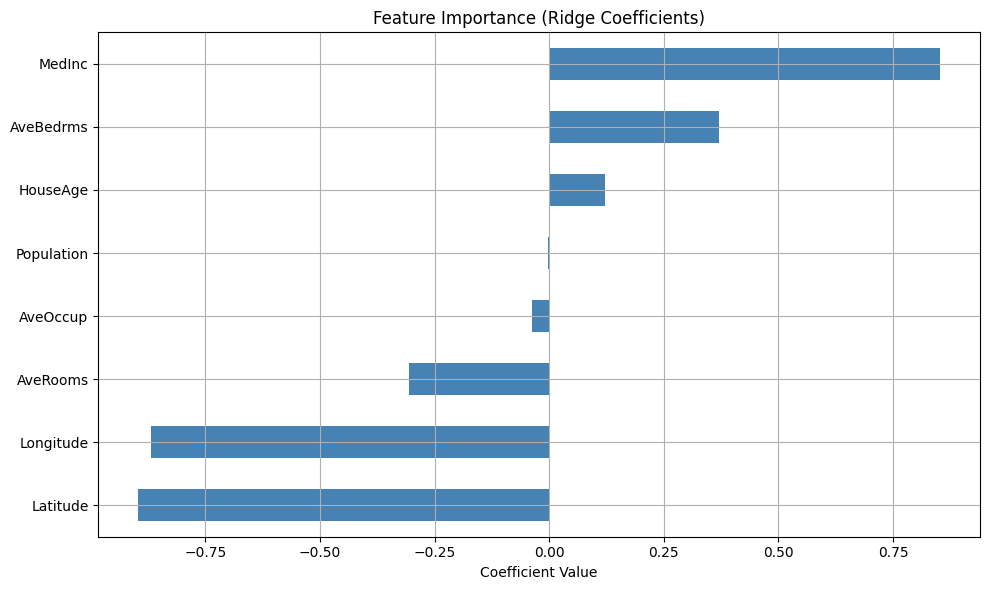

In [16]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🛑 Suppress font warnings and enforce clean font
warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'DejaVu Sans'

# 🧾 Load data
X = pd.read_csv("california_processed.csv")
y = pd.read_csv("california_target.csv").squeeze()

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# 📊 Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# 📍 Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values (Ridge Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Plot 2: Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="darkred", bins=30)
plt.title("Residual Distribution (Ridge Regression)")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Plot 3: Feature importance
coefs = pd.Series(ridge.coef_, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh', color='steelblue')
plt.title("Feature Importance (Ridge Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


## Lasso Regression 🧮

Lasso Regression (Least Absolute Shrinkage and Selection Operator) applies L1 regularization to linear regression. Unlike Ridge, Lasso can shrink some coefficients to exactly zero, effectively performing feature selection.

**Key Characteristics:**
- Uses L1 penalty (absolute values of coefficients).
- Helps reduce model complexity and remove irrelevant features.
- Especially useful when there are many features and potential multicollinearity.



Lasso Regression Results:
MAE  = 0.6221
MSE  = 0.6796
RMSE = 0.8243
R²   = 0.4814


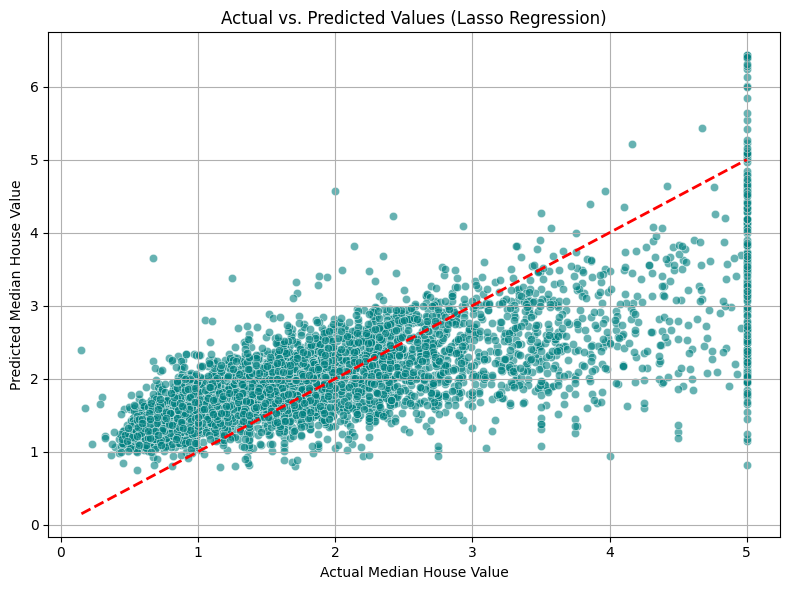

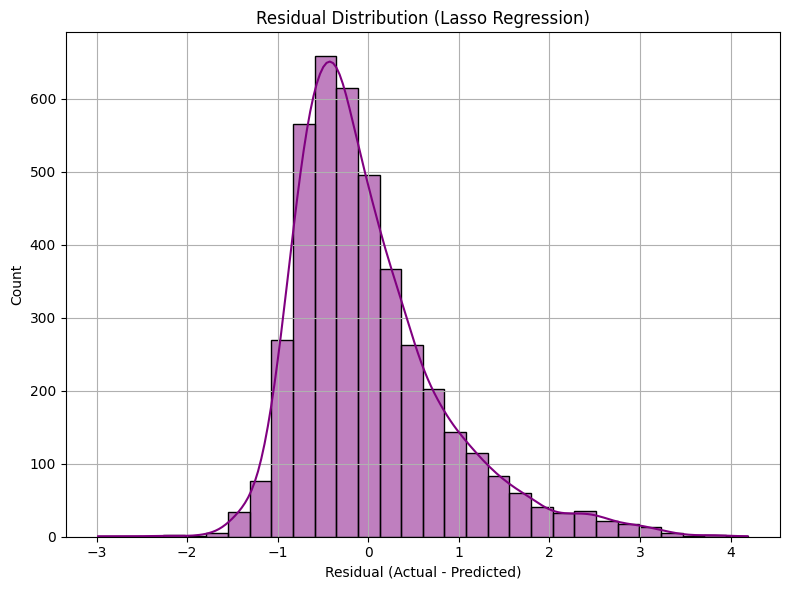

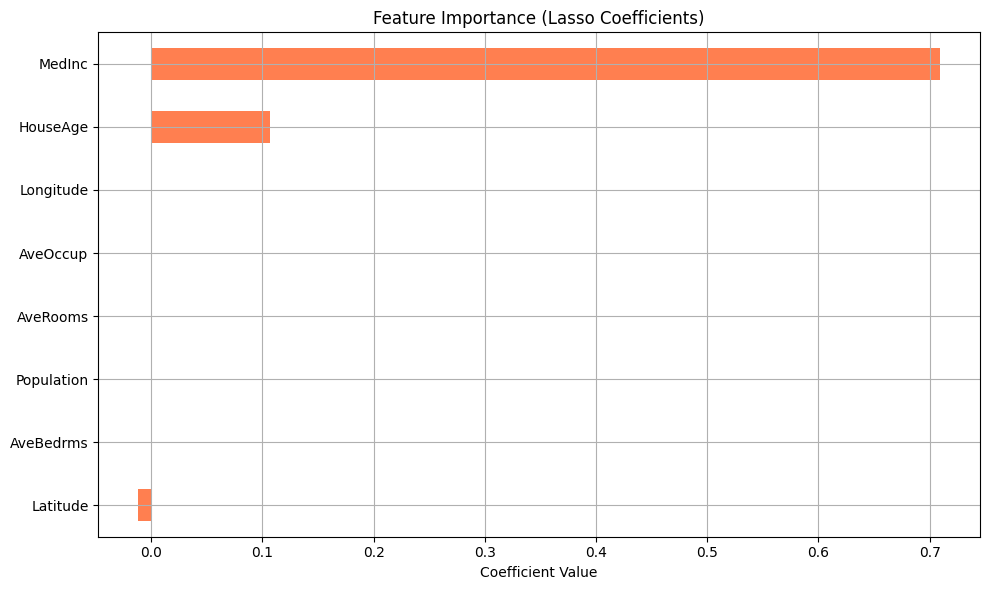

In [17]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🛑 Suppress font warnings and enforce clean font
warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'DejaVu Sans'

# 🧾 Load data
X = pd.read_csv("california_processed.csv")
y = pd.read_csv("california_target.csv").squeeze()

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# 📊 Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# 📍 Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="teal", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values (Lasso Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Plot 2: Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple", bins=30)
plt.title("Residual Distribution (Lasso Regression)")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Plot 3: Feature importance
coefs = pd.Series(lasso.coef_, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh', color='coral')
plt.title("Feature Importance (Lasso Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


## ElasticNet Regression 🧬

ElasticNet combines both L1 (Lasso) and L2 (Ridge) penalties during training, making it a hybrid approach that leverages the benefits of both methods.

**Key Concepts:**
- L1 penalty encourages sparsity (zero coefficients),
- L2 penalty encourages small but non-zero coefficients,
- Controlled by two parameters:
  - `alpha` – regularization strength,
  - `l1_ratio` – the mix between L1 and L2 (0 = Ridge, 1 = Lasso).

ElasticNet is particularly effective when:
- There are many correlated features,
- Lasso alone is too aggressive,
- Ridge alone is not sparse enough.


ElasticNet Regression Results:
MAE  = 0.5970
MSE  = 0.6358
RMSE = 0.7973
R²   = 0.5148


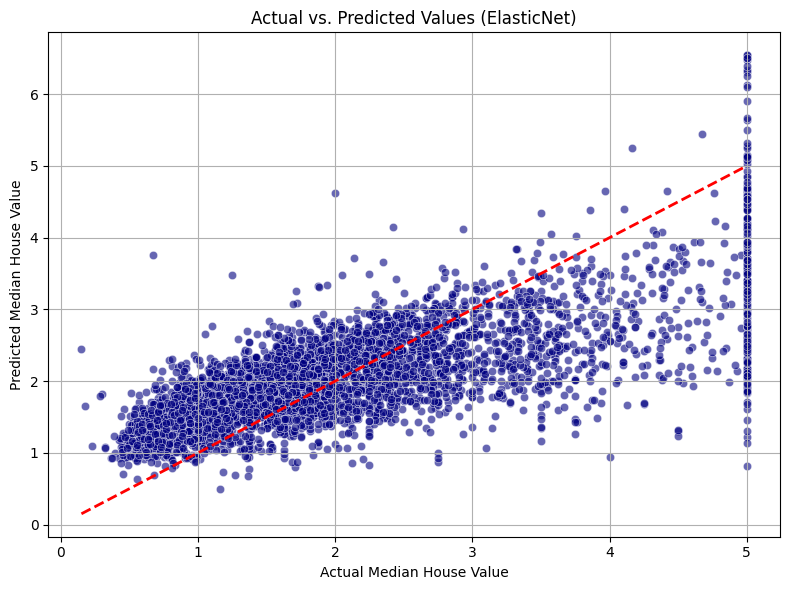

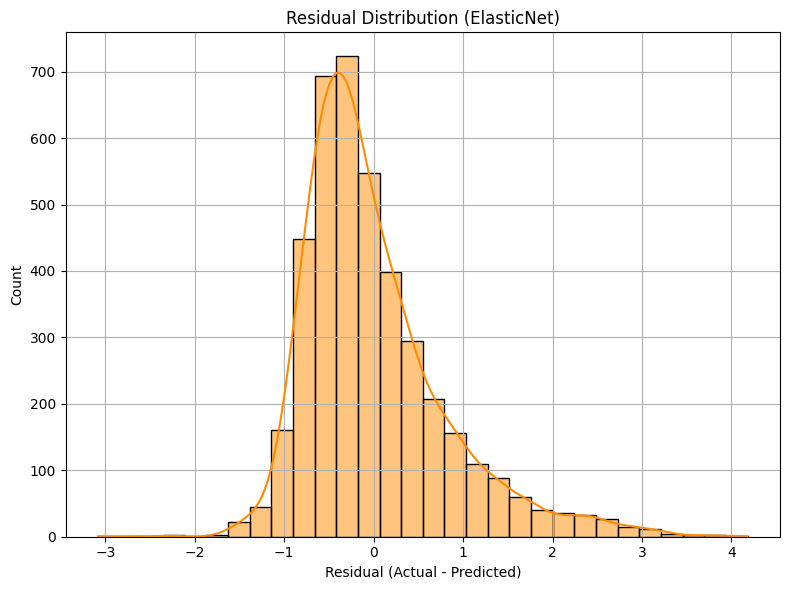

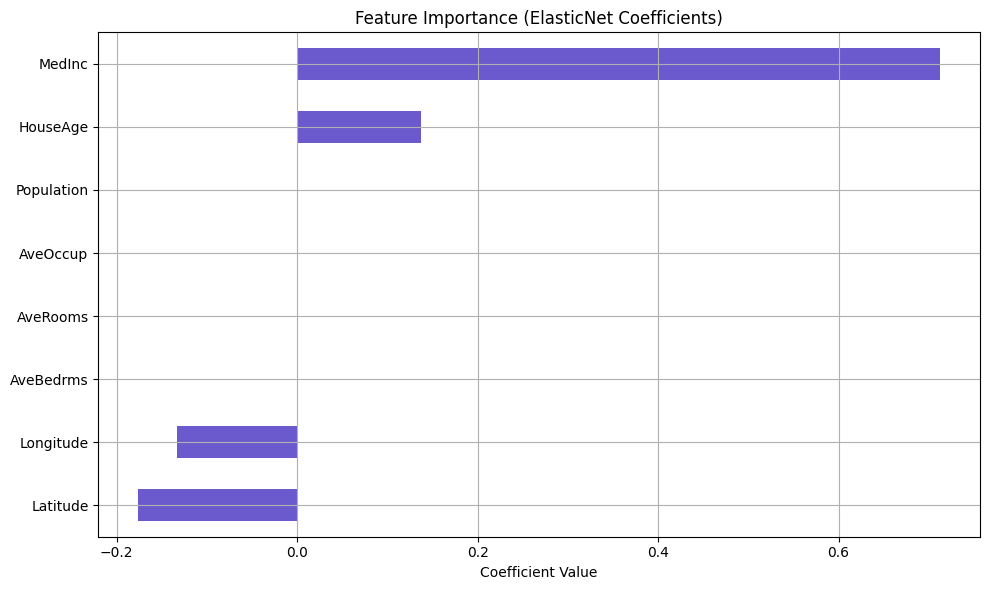

In [18]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🛑 Suppress font warnings and enforce clean font
warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'DejaVu Sans'

# 🧾 Load preprocessed data
X = pd.read_csv("california_processed.csv")
y = pd.read_csv("california_target.csv").squeeze()

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train ElasticNet model
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)

# 📊 Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("ElasticNet Regression Results:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# 📍 Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="navy", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values (ElasticNet)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Plot 2: Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="darkorange", bins=30)
plt.title("Residual Distribution (ElasticNet)")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Plot 3: Feature importance
coefs = pd.Series(elastic.coef_, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh', color='slateblue')
plt.title("Feature Importance (ElasticNet Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


## Decision Tree Regression 🌳

Decision Tree Regression uses a tree-like structure to model decisions and outcomes. It splits the dataset into regions with similar values by asking questions (splits) based on feature thresholds.

**Key Characteristics:**
- Non-linear model: can handle complex patterns in data.
- No need to scale features.
- Prone to overfitting on training data (can be mitigated using pruning or max depth).



Decision Tree Regression Results:
MAE  = 0.4482
MSE  = 0.4220
RMSE = 0.6497
R²   = 0.6779


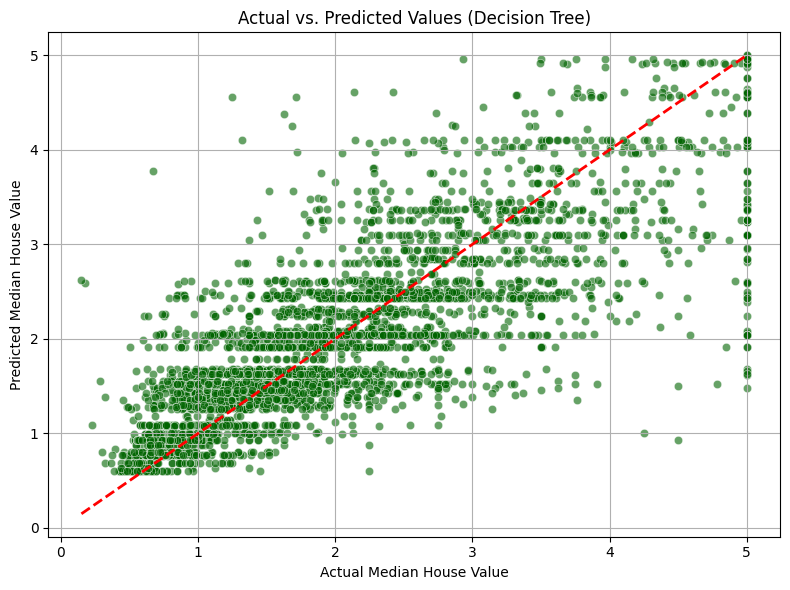

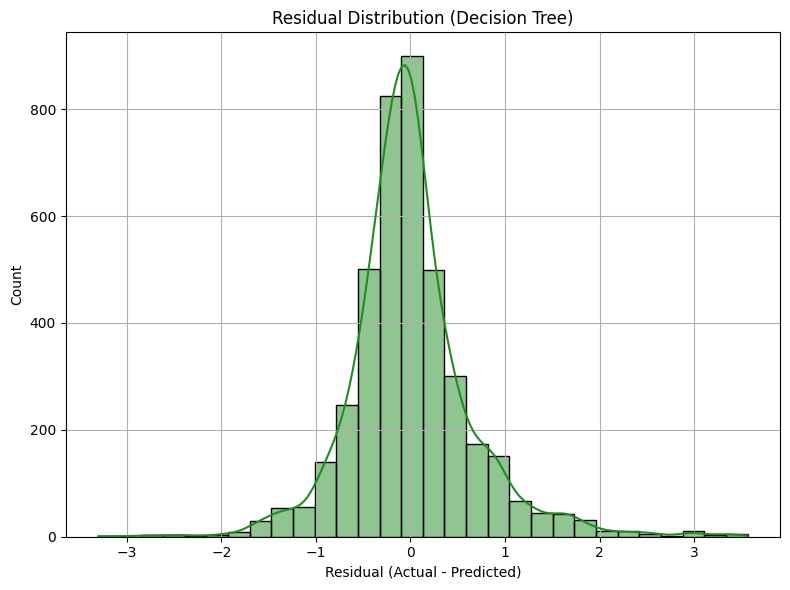

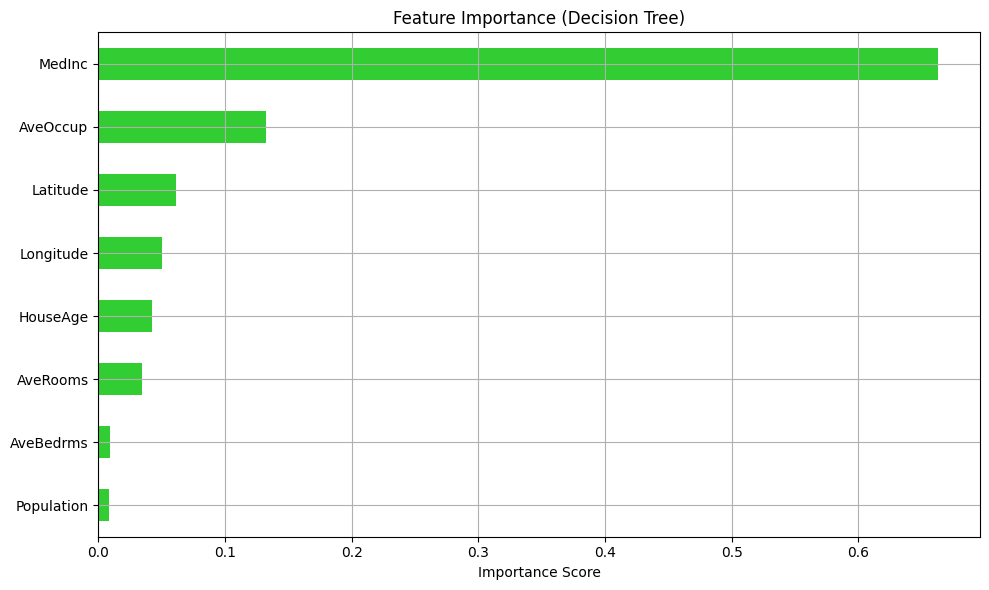

In [19]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🛑 Suppress font warnings and enforce clean font
warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'DejaVu Sans'

# 🧾 Load preprocessed data
X = pd.read_csv("california_processed.csv")
y = pd.read_csv("california_target.csv").squeeze()

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Train Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=8, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# 📊 Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression Results:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# 📍 Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="darkgreen", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values (Decision Tree)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Plot 2: Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="forestgreen", bins=30)
plt.title("Residual Distribution (Decision Tree)")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Plot 3: Feature importance
coefs = pd.Series(tree.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh', color='limegreen')
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()


## Random Forest Regression 🌲

Random Forest is an ensemble technique that builds multiple decision trees and averages their outputs for better accuracy and generalization.

**Why Random Forest?**
- Reduces overfitting compared to a single decision tree.
- Handles non-linear relationships well.
- Automatically handles feature importance.
- More robust to noise in the data.




Random Forest Regression Results:
MAE  = 0.3663
MSE  = 0.2965
RMSE = 0.5445
R²   = 0.7737


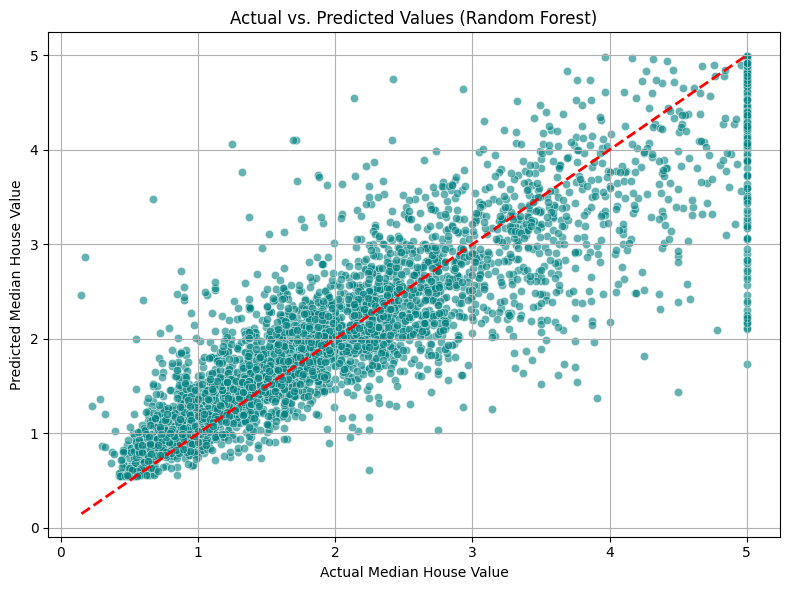

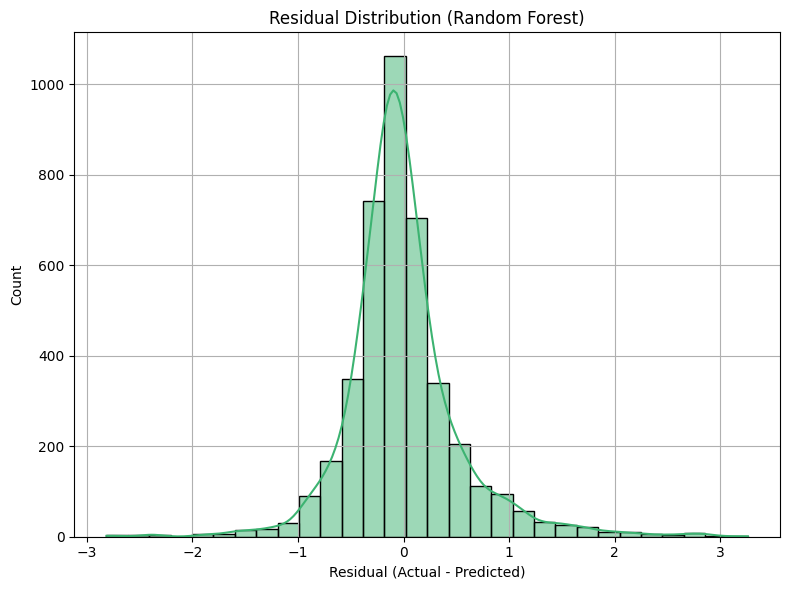

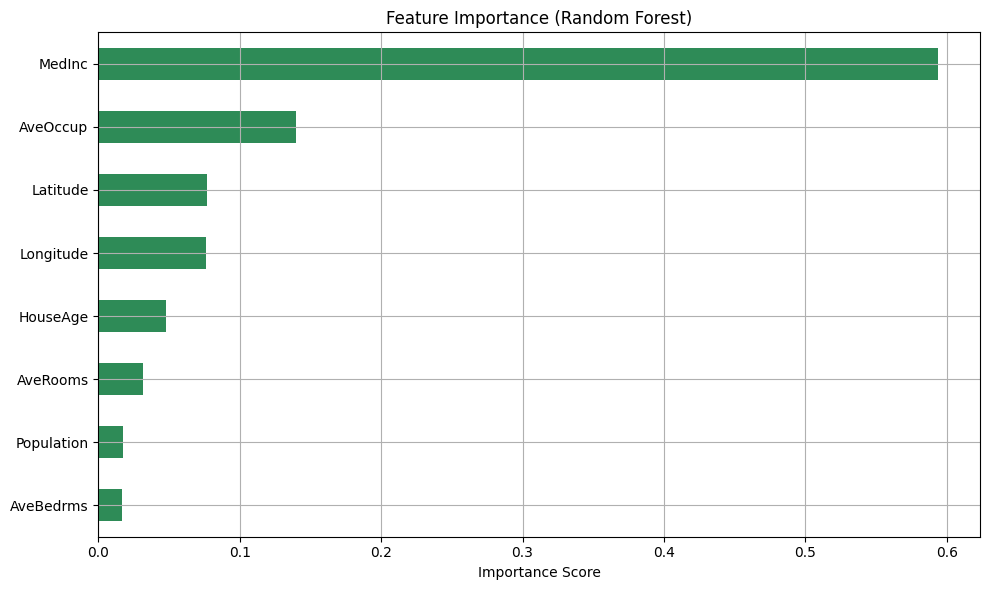

In [20]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🛑 Suppress font warnings and enforce clean font
warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'DejaVu Sans'

# 🧾 Load preprocessed data
X = pd.read_csv("california_processed.csv")
y = pd.read_csv("california_target.csv").squeeze()

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Train Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

# 📊 Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Results:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# 📍 Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="teal", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Plot 2: Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="mediumseagreen", bins=30)
plt.title("Residual Distribution (Random Forest)")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Plot 3: Feature importance
coefs = pd.Series(forest.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh', color='seagreen')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()
